In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import circlify

## World population by continents

In [564]:
world = pd.read_csv('data/world_population.csv')
world_cp = world.copy()
world_cp.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [565]:
# drop unnecessary columns
world_cp = world_cp.drop(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Area (km²)', 'Density (per km²)', 'Growth Rate'], axis=1)

# lowercase all the columns
world_cp.columns = world_cp.columns.str.lower()

# replace the spaces with underscore
world_cp.columns = world_cp.columns.str.replace(' ', '_')

# rename the columns
world_cp = world_cp.rename(columns={'2022_population': '2022', '2020_population': '2020', '2015_population': '2015', '2010_population': '2010', '2000_population': '2000', '1990_population': '1990', '1980_population': '1980', '1970_population': '1970'})

# reorder the columns
world_cp = world_cp[['continent', '1970','1980', '1990', '2000', '2010', '2015', '2020', '2022']]
world_cp.head()

,continent,1970,1980,1990,2000,2010,2015,2020,2022
0,Asia,10752971,12486631,10694796,19542982,28189672,33753499,38972230,41128771
1,Europe,2324731,2941651,3295066,3182021,2913399,2882481,2866849,2842321
2,Africa,13795915,18739378,25518074,30774621,35856344,39543154,43451666,44903225
3,Oceania,27075,32886,47818,58230,54849,51368,46189,44273
4,Europe,19860,35611,53569,66097,71519,71746,77700,79824


### Line Graph

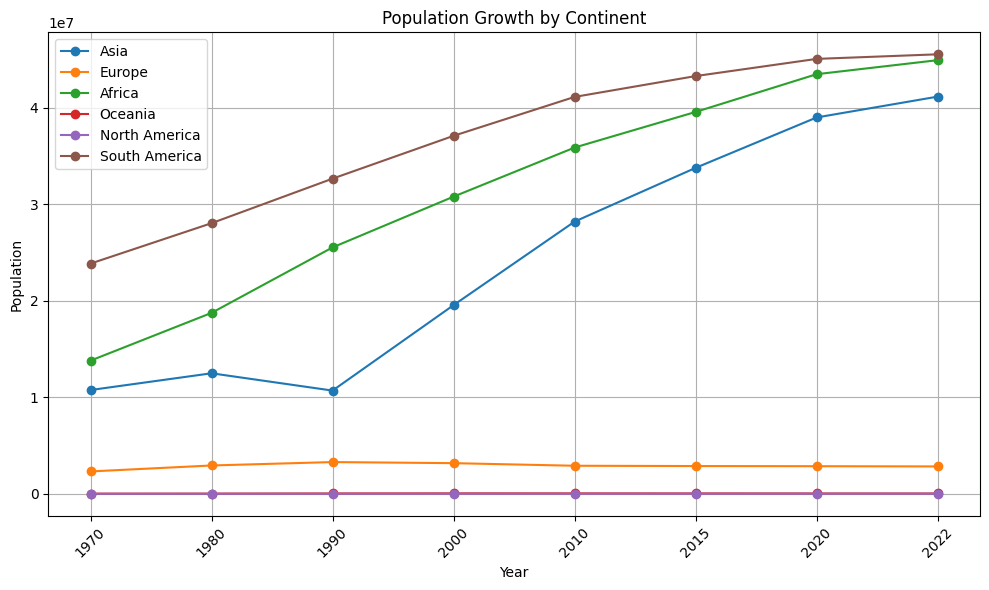

In [566]:
plt.figure(figsize=(10, 6))

for continent in world_cp['continent'].unique():
    df_continent = world_cp[world_cp['continent'] == continent]
    plt.plot(df_continent.columns[1:], df_continent.values[0][1:], marker='o', label=continent)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth by Continent')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [567]:
raw_df = pd.read_csv('./data/FAOSTAT_data.csv')
raw_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94,E,Estimated value,NaN


Food insecurity:

* Prevalence of severe food insecurity in the total population (percent): 210401 (M/F)
* Prevalence of moderate or severe food insecurity in the total population (percent): 210091 (M/F)
* Number of severely food insecure people (million): 210071 (M/F)
* Number of moderately or severely food insecure people (million): 210081 (M/F)

## Further cleaning and preprocessing

In [568]:
raw_df.columns = raw_df.columns.str.lower()
raw_df.columns = raw_df.columns.str.replace(' ', '_')
# change the area column to country column
raw_df = raw_df.rename(columns={'area': 'country'})

In [569]:
# filter out the data by item code
# prevalence of severe food insecurity in the total population
prev_severe_total = raw_df[raw_df['item_code'] == '210401'] 
prev_severe_male = raw_df[raw_df['item_code'] == '210401M']
prev_sever_female = raw_df[raw_df['item_code'] == '210401F']

# prevalence of moderate or severe food insecurity in the total population
prev_mod_total = raw_df[raw_df['item_code'] == '210091']
prev_mod_male = raw_df[raw_df['item_code'] == '210091M']
prev_mod_female = raw_df[raw_df['item_code'] == '210091F']

In [570]:
prev_severe_total.head()

,domain_code,domain,area_code_(m49),country,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description,note
140,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20142016,2014-2016,%,14.8,A,Official figure,FAO data
141,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20152017,2015-2017,%,15.1,A,Official figure,FAO data
142,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20162018,2016-2018,%,17.3,A,Official figure,FAO data
143,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20172019,2017-2019,%,17.3,A,Official figure,Official estimate
144,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20182020,2018-2020,%,19.8,A,Official figure,Official estimate


In [571]:
# read the data
code_df = pd.read_csv('./data/country_annotation.csv')

# drop unnecessary columns
code_df = code_df.drop(columns=['code', 'languages'])

# rename the columns
code_df = code_df.rename(columns={'name':'country'})

code_df.head()

,country,continent
0,United States,North America
1,Dominican Republic,North Americ
2,Canada,North America
3,Honduras,North America
4,Costa Rica,North America


In [572]:
# copy the dataframe
df = prev_severe_total.copy()
# change the value column type to numeric value
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [573]:
# group by the country and get the sum of all the values
df = df.groupby('country', as_index=False)['value'].sum().reset_index(drop=True)
df.head()

,country,value
0,Afghanistan,135.3
1,Albania,65.5
2,Algeria,65.1
3,American Samoa,0.0
4,Andorra,0.0


In [574]:
# merge the region data with the main data
df = pd.merge(df, code_df, on='country', how='left')

In [575]:
# drop the rows with value 0
df = df[df['value'] != 0].reset_index(drop=True)
df

,country,value,continent
0,Afghanistan,135.3,Asia
1,Albania,65.5,Europe
2,Algeria,65.1,Africa
3,Angola,133.5,Africa
4,Antigua and Barbuda,14.2,NaN
...,...,...,...
141,Vanuatu,9.6,Oceania
142,Viet Nam,2.3,NaN
143,Yemen,80.4,Asia
144,Zambia,189.4,Africa


In [576]:
# dictionary mapping each country to its continent
country_to_continent = {
    'Antigua and Barbuda': 'North America',
    'Bahamas': 'North America',
    'Barbados': 'North America',
    'Belize': 'North America',
    'Cabo Verde': 'Africa',
    'Congo': 'Africa',
    'Czechia': 'Europe',
    'Côte d\'Ivoire': 'Africa',
    'Eswatini': 'Africa',
    'Grenada': 'North America',
    'Haiti': 'North America',
    'Iran (Islamic Republic of)': 'Asia',
    'Jamaica': 'North America',
    'Lao People\'s Democratic Republic': 'Asia',
    'Myanmar': 'Asia',
    'Netherlands (Kingdom of the)': 'Europe',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Russian Federation': 'Europe',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Sao Tome and Principe': 'Africa',
    'Trinidad and Tobago': 'North America',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'Viet Nam': 'Asia'
}

# map the country to the continent
df['continent'] = df['continent'].fillna(df['country'].map(country_to_continent))

df

,country,value,continent
0,Afghanistan,135.3,Asia
1,Albania,65.5,Europe
2,Algeria,65.1,Africa
3,Angola,133.5,Africa
4,Antigua and Barbuda,14.2,North America
...,...,...,...
141,Vanuatu,9.6,Oceania
142,Viet Nam,2.3,Asia
143,Yemen,80.4,Asia
144,Zambia,189.4,Africa


In [577]:
# data sanity check
# check the continent value
df.continent.unique()

# replace the incorrect value
df['continent'] = df['continent'].str.replace('North Americ', 'North America')
df['continent'] = df['continent'].str.replace('North Americaa', 'North America')

In [578]:
df

,country,value,continent
0,Afghanistan,135.3,Asia
1,Albania,65.5,Europe
2,Algeria,65.1,Africa
3,Angola,133.5,Africa
4,Antigua and Barbuda,14.2,North America
...,...,...,...
141,Vanuatu,9.6,Oceania
142,Viet Nam,2.3,Asia
143,Yemen,80.4,Asia
144,Zambia,189.4,Africa


## Data Visualiztion: Prevalence of severe food insecurity in the total population

### Nested pie chart

In [579]:
# plot a nested pie chart using plotly
fig = px.sunburst(df, path=['continent', 'country'], values='value', names = 'country', title='Prevalence of severe food insecurity in the total population',color_discrete_sequence=px.colors.qualitative.Set3)
# change the plot size
fig.update_layout(width=800, height=800)
fig.show()

### Packed Bubble chart

In [580]:
# group the df by continent and aggregate the data
grouped_df = df.groupby('continent').apply(lambda x: x[['country', 'value']].to_dict(orient='records')).reset_index(name='data')

# convert the grouped DataFrame to a dictionary
result_dict = grouped_df.set_index('continent').to_dict(orient='index')

print(result_dict)

{'Africa': {'data': [{'country': 'Algeria', 'value': 65.1}, {'country': 'Angola', 'value': 133.5}, {'country': 'Benin', 'value': 95.0}, {'country': 'Botswana', 'value': 161.6}, {'country': 'Burkina Faso', 'value': 100.3}, {'country': 'Cabo Verde', 'value': 38.5}, {'country': 'Cameroon', 'value': 185.9}, {'country': 'Central African Republic', 'value': 185.39999999999998}, {'country': 'Comoros', 'value': 54.8}, {'country': 'Congo', 'value': 355.5}, {'country': "Côte d'Ivoire", 'value': 59.5}, {'country': 'Democratic Republic of the Congo', 'value': 118.4}, {'country': 'Djibouti', 'value': 33.0}, {'country': 'Egypt', 'value': 55.7}, {'country': 'Eswatini', 'value': 36.6}, {'country': 'Ethiopia', 'value': 115.5}, {'country': 'Gambia', 'value': 151.6}, {'country': 'Ghana', 'value': 42.0}, {'country': 'Guinea', 'value': 338.9}, {'country': 'Guinea-Bissau', 'value': 103.0}, {'country': 'Kenya', 'value': 156.8}, {'country': 'Lesotho', 'value': 119.69999999999999}, {'country': 'Liberia', 'valu

/var/folders/27/cc8xpbnj4vgc0f2m9xmmtc_r0000gn/T/ipykernel_45541/2385084736.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



---

In [581]:
# load the data
cleaned_df = pd.read_csv('./data/CleanedData/foodinsecuritybygender.csv', encoding='ISO-8859-1')
# convert it to dataframe
cleaned_df = pd.DataFrame(cleaned_df)
cleaned_df.head()

,Unnamed: 0,Area,Region,YearPeriod,PrimaryColonizer,AVG_PercentFemale,AVG_PercentMale
0,1,Albania,Europe,Y20002002,NaN,NaN,NaN
1,2,Albania,Europe,Y20012003,NaN,NaN,NaN
2,3,Albania,Europe,Y20022004,NaN,NaN,NaN
3,4,Albania,Europe,Y20032005,NaN,NaN,NaN
4,5,Albania,Europe,Y20042006,NaN,NaN,NaN


In [582]:
# fill the null values with 0
cleaned_df['AVG_PercentFemale']= cleaned_df['AVG_PercentFemale'].fillna(0)
cleaned_df['AVG_PercentMale']= cleaned_df['AVG_PercentMale'].fillna(0)

# convert the data type to numeric
cleaned_df['AVG_PercentFemale'] = pd.to_numeric(cleaned_df['AVG_PercentFemale'], errors='coerce')
cleaned_df['AVG_PercentMale'] = pd.to_numeric(cleaned_df['AVG_PercentMale'], errors='coerce')

# add a new boolean column if the primarycolonizer column is not null
cleaned_df['colonizer'] = cleaned_df['PrimaryColonizer'].notnull()

cleaned_df

,Unnamed: 0,Area,Region,YearPeriod,PrimaryColonizer,AVG_PercentFemale,AVG_PercentMale,colonizer
0,1,Albania,Europe,Y20002002,NaN,0.0,0.0,False
1,2,Albania,Europe,Y20012003,NaN,0.0,0.0,False
2,3,Albania,Europe,Y20022004,NaN,0.0,0.0,False
3,4,Albania,Europe,Y20032005,NaN,0.0,0.0,False
4,5,Albania,Europe,Y20042006,NaN,0.0,0.0,False
...,...,...,...,...,...,...,...,...
1969,1970,Zimbabwe,Africa,Y20162018,United Kingdom of Great Britain and Northern I...,37.1,34.6,True
1970,1971,Zimbabwe,Africa,Y20172019,United Kingdom of Great Britain and Northern I...,35.8,32.5,True
1971,1972,Zimbabwe,Africa,Y20182020,United Kingdom of Great Britain and Northern I...,33.7,30.6,True
1972,1973,Zimbabwe,Africa,Y20192021,United Kingdom of Great Britain and Northern I...,33.1,29.6,True


In [583]:
# drop the year column
another_df = cleaned_df.drop(columns=['YearPeriod', 'Unnamed: 0', 'PrimaryColonizer', 'colonizer'])
# group by the country and get the sum of all the values
another_df = another_df.groupby(['Area', 'Region'], as_index=False).sum().reset_index(drop=True)
another_df.head()

,Area,Region,AVG_PercentFemale,AVG_PercentMale
0,Albania,Europe,73.8,57.2
1,Algeria,Africa,67.5,62.9
2,Andorra,Europe,0.0,0.0
3,Angola,Africa,139.6,127.7
4,Austria,Europe,8.5,8.1


In [587]:
# group by region again
region_sum = another_df.groupby('Region').agg({'AVG_PercentFemale': 'sum', 'AVG_PercentMale': 'sum'}).reset_index()
region_sum

,Region,AVG_PercentFemale,AVG_PercentMale
0,Africa,6061.9,5860.8
1,Europe,520.5,492.7


In [590]:
# merge the sum with the original DataFrame based on 'Region'
df_merged = another_df.merge(region_sum, on='Region', suffixes=('', '_Sum'))
# change the column name
df_merged = df_merged.rename(columns={'AVG_PercentFemale_Sum': 'Continent_Sum_Female', 'AVG_PercentMale_Sum': 'Continent_Sum_Male'})
df_merged

,Area,Region,AVG_PercentFemale,AVG_PercentMale,Continent_Sum_Female,Continent_Sum_Male
0,Albania,Europe,73.8,57.2,520.5,492.7
1,Algeria,Africa,67.5,62.9,6061.9,5860.8
2,Andorra,Europe,0.0,0.0,520.5,492.7
3,Angola,Africa,139.6,127.7,6061.9,5860.8
4,Austria,Europe,8.5,8.1,520.5,492.7
...,...,...,...,...,...,...
89,Ukraine,Europe,18.6,16.9,520.5,492.7
90,United Kingdom of Great Britain and Northern I...,Europe,11.6,9.4,520.5,492.7
91,United Republic of Tanzania,Africa,177.6,167.6,6061.9,5860.8
92,Zambia,Africa,189.1,189.6,6061.9,5860.8


In [592]:
# change the dataframe to dictionary
df2 = df_merged.groupby('Region')
# initialize the dictionary
data = []

# iterate over each group
for region, group in df2:
    children = []
    # iterate over each row in the group
    for _, row in group.iterrows():
        children.append({
            'id': row['Area'],
            'datum': {'AVG_PercentFemale': row['AVG_PercentFemale'], 'AVG_PercentMale': row['AVG_PercentMale']}
        })
    # append region and its children to the data dictionary
    data.append({'id': region, 'datum': group['AVG_PercentFemale'].sum(), 'children': children})

print(data)

[{'id': 'Africa', 'datum': 6061.900000000001, 'children': [{'id': 'Algeria', 'datum': {'AVG_PercentFemale': 67.5, 'AVG_PercentMale': 62.900000000000006}}, {'id': 'Angola', 'datum': {'AVG_PercentFemale': 139.60000000000002, 'AVG_PercentMale': 127.7}}, {'id': 'Benin', 'datum': {'AVG_PercentFemale': 97.39999999999999, 'AVG_PercentMale': 92.7}}, {'id': 'Botswana', 'datum': {'AVG_PercentFemale': 179.9, 'AVG_PercentMale': 143.6}}, {'id': 'Burkina Faso', 'datum': {'AVG_PercentFemale': 93.0, 'AVG_PercentMale': 108.0}}, {'id': 'Burundi', 'datum': {'AVG_PercentFemale': 0.0, 'AVG_PercentMale': 0.0}}, {'id': 'Cabo Verde', 'datum': {'AVG_PercentFemale': 38.5, 'AVG_PercentMale': 38.5}}, {'id': 'Cameroon', 'datum': {'AVG_PercentFemale': 178.0, 'AVG_PercentMale': 193.7}}, {'id': 'Central African Republic', 'datum': {'AVG_PercentFemale': 185.39999999999998, 'AVG_PercentMale': 185.39999999999998}}, {'id': 'Chad', 'datum': {'AVG_PercentFemale': 0.0, 'AVG_PercentMale': 0.0}}, {'id': 'Comoros', 'datum': {'

In [600]:
circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14, 14))

# title
ax.set_title('Repartition of the world population')

# remove axes
ax.axis('off')

# find axis boundaries
lim = max(
    max(
        circle['x'] + circle['r'],
        circle['y'] + circle['r'],
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circle the highest level (continents):
for circle in circles:
    if circle['level'] != 2:
        continue
    x, y, r = circle['x'], circle['y'], circle['r']
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="lightblue"))

# print circle and labels for the highest level:
for circle in circles:
    if circle['level'] != 3:
        continue
    x, y, r = circle['x'], circle['y'], circle['r']
    label = circle['ex']["id"]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x, y), ha='center', color="white")

# print labels for the continents
for circle in circles:
    if circle['level'] != 2:
        continue
    x, y, _ = circle['x'], circle['y'], circle['r']
    label = circle['ex']["id"]
    plt.annotate(label, (x, y), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

TypeError: unsupported operand type(s) for +: 'dict' and 'int'

Colors:

Europe: #140D4F
Africa: #598B2C

#11270B
#42CAFD
#FFA400
#F5EDF0
#1C0B19
#66B3BA
#92140C

In [526]:
colors = ['#11270B', '#42CAFD', '#FFA400', '#F5EDF0', '#1C0B19', '#66B3BA', '#92140C']

data_dict = {
    'Area': another_df['Area'].tolist(),
    'AVG_PercentFemale': another_df['AVG_PercentFemale'].tolist(),
    'AVG_PercentMale': another_df['AVG_PercentMale'].tolist(),
    'color': colors[:len(another_df)]  # Selecting colors based on the length of the DataFrame
}

In [527]:
#| vscode: {languageId: python}
# browser_market_share = {
#     'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
#     'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
#     'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00']
# }

# colors = {'color': ['#11270B', '#42CAFD', '#FFA400', '#F5EDF0', '#1C0B19', '#66B3BA', '#92140C']}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=data_dict['AVG_PercentFemale'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, data_dict['Area'], colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Food Insecurity')

plt.show()

IndexError: list index out of range

Error in callback <function flush_figures at 0x336e300e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 